<a href="https://colab.research.google.com/github/aTamucci02/cosc470s24/blob/main/AILab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [1]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [2]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [4]:
import numpy as np
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [5]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]
#there are 10 elements in the array because the 10 output nodes correspond to the 10 possible digits we are returning. Each digit has a different average darkness


# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0])
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  differnces = np.abs(darkness_averages - darkness)
  return np.argmin(differnces)

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[0.5418367346938775, 0.8290748898678414, 0.04844961240310078, 0.048514851485148516, 0.048879837067209775, 0.0795964125560538, 0.06576200417536535, 0.28793774319066145, 0.13655030800821355, 0.04261645193260654]


In [7]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 10, 10, 3.0, test_data=test_data)


Epoch 0 : 7635 / 10000
Epoch 1 : 8391 / 10000
Epoch 2 : 8444 / 10000
Epoch 3 : 8491 / 10000
Epoch 4 : 8534 / 10000
Epoch 5 : 9366 / 10000
Epoch 6 : 9412 / 10000
Epoch 7 : 9402 / 10000
Epoch 8 : 9437 / 10000
Epoch 9 : 9462 / 10000


In [8]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[9.73687821e-13]
 [9.94378873e-01]
 [4.79078020e-03]
 [8.31826210e-05]
 [1.06319488e-07]
 [3.62394820e-06]
 [1.75203227e-06]
 [5.07880083e-03]
 [1.19007812e-03]
 [8.85171780e-09]]
1
1
[954, 1111, 972, 938, 940, 810, 924, 964, 917, 932]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9734693877551021, 0.9788546255506608, 0.9418604651162791, 0.9287128712871288, 0.9572301425661914, 0.9080717488789237, 0.964509394572025, 0.9377431906614786, 0.9414784394250514, 0.9236868186323092]


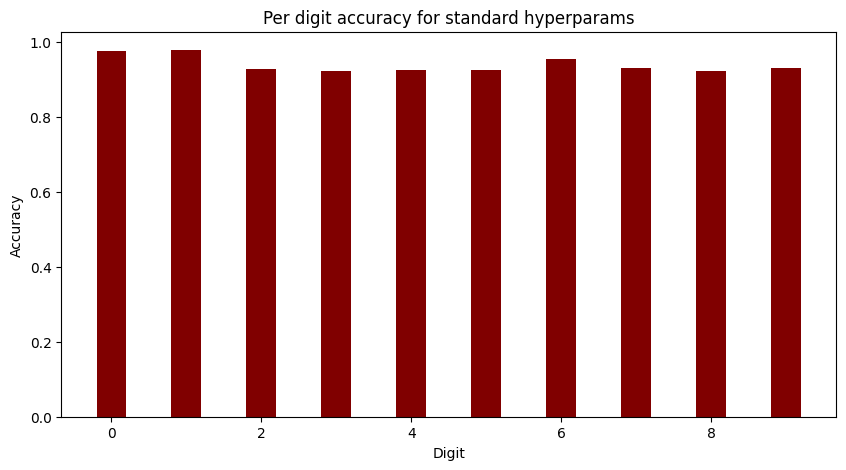

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [12]:
import os
from PIL import Image
import numpy as np

def load_and_process_images(directory):
    images = []
    labels = []  # Assuming file names give some clue about the labels or categories
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            label = filename.split('.')[0]  # Simplistic approach: use part of file name as label
            filepath = os.path.join(directory, filename)
            image = Image.open(filepath).convert('L')  # Convert to grayscale
            image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28
            image_array = np.asarray(image, dtype=np.float32)  # Convert to numpy array
            image_array = image_array.reshape(784, 1)  # Flatten to fit input size of the network
            image_array /= 255.0  # Normalize pixel values
            images.append(image_array)
            labels.append(label)
    return images, labels

# Assuming 'net' is your neural network instance and is already trained
def classify_images(images, net):
    results = []
    for img in images:
        output = net.feedforward(img)
        predicted_digit = np.argmax(output)
        results.append(predicted_digit)
    return results

# Load and process images
directory = "/content/NewNumbers"
images, labels = load_and_process_images(directory)

# Classify images
results = classify_images(images, net)

# Output results (here you might want to compare results with expected labels)
print(results)


[1, 5, 7, 9, 8, 9, 5, 4, 2, 6, 1, 7, 2, 2, 5, 5, 4, 5, 5, 9, 4, 5, 5, 4, 1, 1, 9, 4, 8, 5]


<ipython-input-12-e9d2bd2870f7>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28


In [13]:
# Initialize counters
good_correct = 0
good_total = 0
small_correct = 0
small_total = 0
large_correct = 0
large_total = 0

good_results = [0]*10
small_results = [0]*10
large_results = [0]*10

# Evaluate each image
for label, result in zip(labels, results):
    true_digit = int(label[-1])  # Assuming last character of label indicates the true digit
    predicted_digit = result

    if "good" in label:
        good_total += 1
        if true_digit == predicted_digit:
            good_correct += 1
            good_results[true_digit] = 1

    elif "small" in label:
        small_total += 1
        if true_digit == predicted_digit:
            small_correct += 1
            small_results[true_digit] = 1

    elif "big" in label:
        large_total += 1
        if true_digit == predicted_digit:
            large_correct += 1
            large_results[true_digit] = 1

# Print results
print(f"Good images correctly classified: {good_correct}/{good_total}")
print(f"Small images correctly classified: {small_correct}/{small_total}")
print(f"Large images correctly classified: {large_correct}/{large_total}")

# Print digit-wise results
print("Good images per digit classification (0=incorrect, 1=correct):", good_results)
print("Small images per digit classification (0=incorrect, 1=correct):", small_results)
print("Large images per digit classification (0=incorrect, 1=correct):", large_results)


Good images correctly classified: 4/10
Small images correctly classified: 0/10
Large images correctly classified: 1/10
Good images per digit classification (0=incorrect, 1=correct): [0, 1, 0, 0, 1, 0, 0, 0, 1, 1]
Small images per digit classification (0=incorrect, 1=correct): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Large images per digit classification (0=incorrect, 1=correct): [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
